#**Day 3**

##Importing libraries and dataset

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#importing dataset
df=pd.read_csv("/content/train - train (2).csv")
df

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,2017,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,35032,2017,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,35035,2017,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,35042,2017,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9


##Missing values
Printing null values of each column with the help of isnull() function.

In [ ]:
#missing values
print(df.isnull().sum())

Unnamed: 0         0
year              15
month              6
day               20
hour               8
PM2.5             14
temperature       19
pressure          27
rain              12
wind_direction    60
wind_speed        25
dtype: int64


##Filling missing values
Backfilling missing values because the data is already in sorted order makes this method more preferable to our dataframe in terms of correctness.

In [ ]:
#filling the missing values by backfill method
df=df.fillna(method="bfill")
df

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,5.6
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,2017,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,35032,2017,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,35035,2017,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,35042,2017,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9


##Encoding
Here wind_direction column cannot be used in the mathematical equation of the model so we need to encode these variables into numbers. To achieve this get_dummies function is imported from the pandas library.

In [ ]:
#encoding
dummies = pd.get_dummies(df['wind_direction'])
df = df.drop('wind_direction',1)
df = pd.concat([df, dummies], axis=1)

##Data cleaning
Some unusual data entry format is found in columns such as **'month,'year',** and **'pressure'.** As a result, we check the location of such errors by applying the required condition and assigning a null to it.

In [ ]:
#replacing errors with null
for x in df.index:
  if df.loc[x,"month"]<1:
    df.loc[x,"month"]=None
  try:
    df.loc[x,"pressure"]=float(df.loc[x,"pressure"])
  except:
    df.loc[x,"pressure"]=None  
for x in df.index:
  try:
    df.loc[x,"year"]=int(df.loc[x,"year"])
  except:
     df.loc[x,"year"]=None

In [ ]:
df.head()


,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,2013,NaN,1.0,0.0,4.0,-0.7,None,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,None,NaN,1.0,1.0,8.0,-1.1,1023.2,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


##**Filling the replaced error using Backfilling**
Backfilling method is used to replace the missing data in this case. As the data set is already sorted concerning **hours, day, month, year**. So if we fill the missing values with mean-value, then the deviation would increase. Hence error would increase. The given features would be almost the same in the next hour also. For example, the temperature is 1.9 at a particular hour, then the next hour if the temperature would be around 1.9 only, not 14.356532039734322. So,backfilling method is chosen.

In [ ]:

# filling (backfill methid) the data after removal of unwanted datas
df=df.fillna(method="bfill")

df.head(8)


,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,2013,3.0,1.0,0.0,4.0,-0.7,1023.2,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,2013,3.0,1.0,1.0,8.0,-1.1,1023.2,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,5,2013,3.0,1.0,6.0,5.0,-2.2,1025.6,0.0,3.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,6,2013,3.0,1.0,6.0,3.0,-2.6,1026.5,0.0,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,7,2013,3.0,1.0,7.0,3.0,-1.6,1027.4,0.0,3.8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.isnull().sum().sum()

0

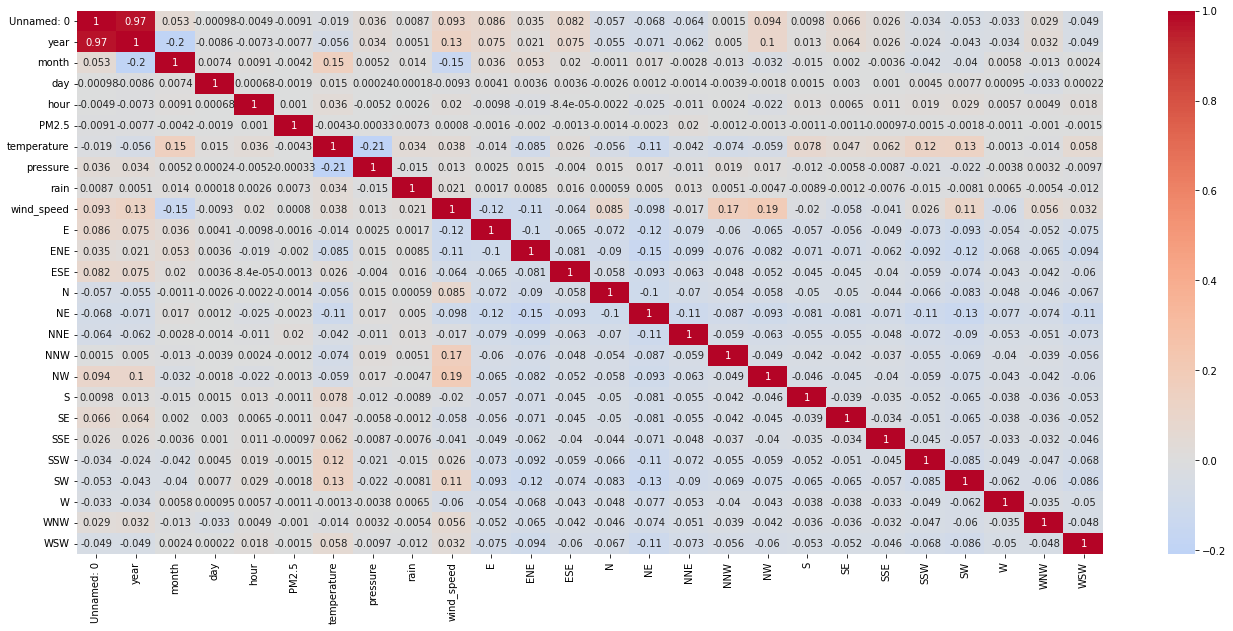

In [ ]:
fig, ax = plt.subplots(figsize=(23,10))
sns.heatmap(df.corr(), cmap='coolwarm',center=0,  annot=True)

#Scaling
With the help of **minxmaxscaler()** from sklearn.preprocessing, the dataframe is scaled down to avoid variance and improve accuracy.

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()#MinMaxScaler()
df[['year','month','hour','pressure']]=scaling.fit_transform(df[['year','month','hour','pressure']])


In [ ]:
df.head(20)

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,-1.372595,-1.043574,1.0,-0.304069,4.0,-0.7,0.318999,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,-1.372595,-1.043574,1.0,-0.277131,8.0,-1.1,0.318999,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,-1.372595,-1.043574,1.0,-0.250193,7.0,-1.1,0.326719,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,-1.372595,-1.043574,1.0,-0.223255,6.0,-1.4,0.352453,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,-1.372595,-1.043574,1.0,-0.196316,3.0,-2.0,0.370467,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,5,-1.372595,-1.043574,1.0,-0.142440,5.0,-2.2,0.380761,0.0,3.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,6,-1.372595,-1.043574,1.0,-0.142440,3.0,-2.6,0.403922,0.0,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,7,-1.372595,-1.043574,1.0,-0.115502,3.0,-1.6,0.427083,0.0,3.8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,8,-1.372595,-1.043574,1.0,-0.088564,3.0,0.1,0.450244,0.0,4.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,9,-1.372595,-1.043574,1.0,-0.061625,3.0,1.2,0.455391,0.0,2.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#mean
df.mean().mean()


704.7336754229073

In [ ]:
#median
df.median().median()

0.0

In [ ]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,-1.372595,-1.043574,1.0,-0.304069,4.0,-0.7,0.318999,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,1,-1.372595,-1.043574,1.0,-0.277131,8.0,-1.1,0.318999,0.0,5.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,-1.372595,-1.043574,1.0,-0.250193,7.0,-1.1,0.326719,0.0,5.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,-1.372595,-1.043574,1.0,-0.223255,6.0,-1.4,0.352453,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,-1.372595,-1.043574,1.0,-0.196316,3.0,-2.0,0.370467,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31522,35022,2.247053,-1.345781,27.0,-0.142440,80.0,-0.3,0.221208,0.0,0.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31523,35032,2.247053,-1.345781,27.0,0.126942,75.0,15.9,0.082242,0.0,2.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31524,35035,2.247053,-1.345781,27.0,0.207757,51.0,11.5,0.084816,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31525,35042,2.247053,-1.345781,28.0,-0.250193,9.0,8.6,0.133711,0.0,0.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


#**Day 4-5**

##Dropping wind_direction
Dropping the column with dummy wind direction values and assigning it to a new dataframe called 'df1'. Because we've previously encoded the dataframe, it has no effect on any of the columns.

In [ ]:
df1 = df.drop(['E','ENE','ESE','N','NE','NNE','NNW','NW','S','SE','SSE','SSW','SW','W','WNW','WSW'],1)
df1

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed
0,0,-1.372595,-1.043574,1.0,-0.304069,4.0,-0.7,0.318999,0.0,4.4
1,1,-1.372595,-1.043574,1.0,-0.277131,8.0,-1.1,0.318999,0.0,5.6
2,2,-1.372595,-1.043574,1.0,-0.250193,7.0,-1.1,0.326719,0.0,5.6
3,3,-1.372595,-1.043574,1.0,-0.223255,6.0,-1.4,0.352453,0.0,3.1
4,4,-1.372595,-1.043574,1.0,-0.196316,3.0,-2.0,0.370467,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
31522,35022,2.247053,-1.345781,27.0,-0.142440,80.0,-0.3,0.221208,0.0,0.8
31523,35032,2.247053,-1.345781,27.0,0.126942,75.0,15.9,0.082242,0.0,2.9
31524,35035,2.247053,-1.345781,27.0,0.207757,51.0,11.5,0.084816,0.0,1.0
31525,35042,2.247053,-1.345781,28.0,-0.250193,9.0,8.6,0.133711,0.0,0.9


##Detecting the outliers
Outliers are identified by creating a boxplot for each column and observing the range and number of dots or "too far away" points, which are values that deviate more or less than the expected range.
We found multivarient outliers in **wind_speed** and **rain** column.

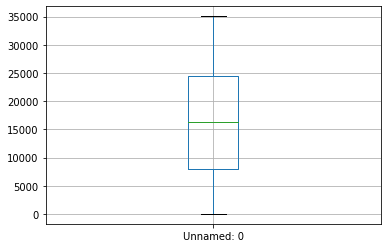

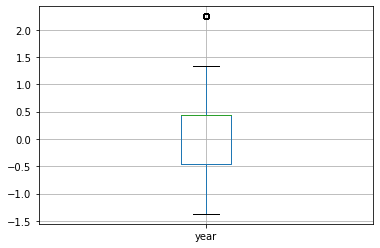

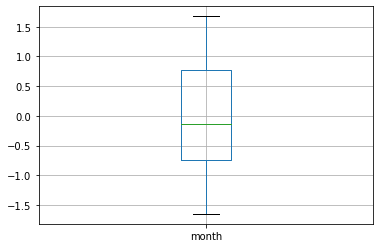

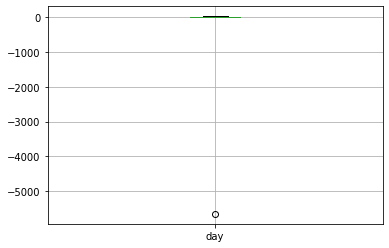

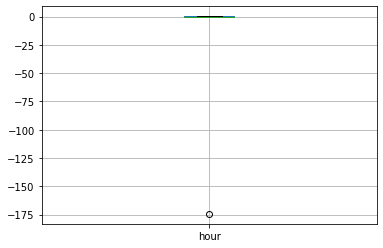

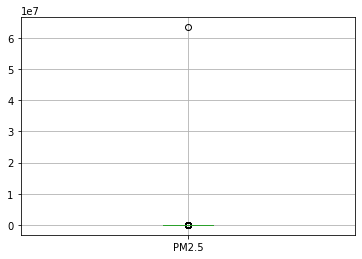

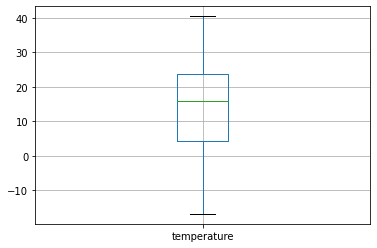

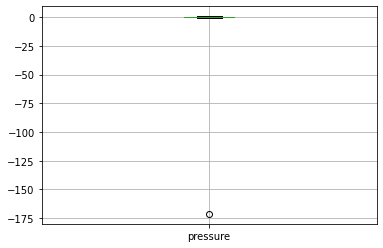

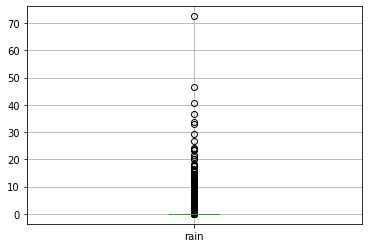

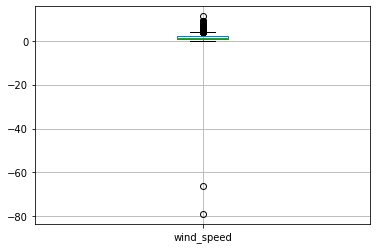

In [ ]:
#boxplot method for detecting outliers
for column in df1:
  try:
    plt.figure()
    df1.boxplot([column])
  except:
    continue

##Replacting Outlier by median method
First, we print the outlier's location by specifying the required condition. After that, we set the detected oulier to null and fill it using the **median** approach.

(array([    0,     1,     2, ..., 31524, 31525, 31526]),)
(array([    0,     1,     2, ..., 31468, 31499, 31500]),)


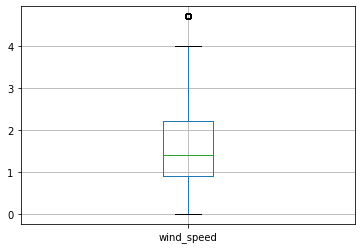

In [ ]:
#REPLACING OUTLIER IN wind_speed COLUMN BY MEDIAN METHOD

# Position of the Outlier
print(np.where(df['wind_speed']>-60))
#replacing lower outlier
median = df.loc[df['wind_speed']>-60, 'wind_speed'].median()
df.loc[df.wind_speed<-60, 'wind_speed'] = np.nan
df.fillna(median,inplace=True)
#replacing upper outlier
print(np.where(df['wind_speed']>4))
median1 = df.loc[df['wind_speed']>4, 'wind_speed'].median()
df.loc[df.wind_speed>4, 'wind_speed'] = np.nan
df.fillna(median1,inplace=True)
df.boxplot(['wind_speed'])


(array([  267,   268,   269, ..., 30880, 31284, 31504]),)


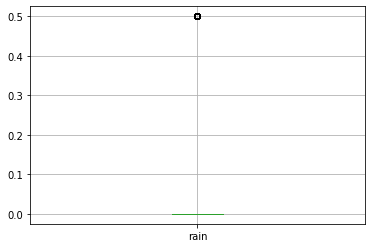

In [ ]:
#REPLACING OUTLIER IN rain COLUMN BY MEDIAN METHOD
# Position of the Outlier
print(np.where(df['rain']>0))
median2 = df.loc[df['rain']>0, 'rain'].median()
df.loc[df1.rain>0, 'rain'] = np.nan
df.fillna(median2,inplace=True)
df.boxplot(['rain'])

##Finding Correlation
The relationship between each column and all other columns is found using the **corr()** function of the **pandas** library.

In [ ]:
#correlation
df[['year','month','day','hour','PM2.5','temperature','pressure','rain','wind_speed']].corr()

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed
year,1.000000,-0.197649,-0.008614,-0.007270,-0.007743,-0.056375,0.033705,0.003302,0.152010
month,-0.197649,1.000000,0.007351,0.009089,-0.004171,0.150874,0.005224,0.048050,-0.172169
day,-0.008614,0.007351,1.000000,0.000683,-0.001939,0.014932,0.000241,0.000659,-0.009848
hour,-0.007270,0.009089,0.000683,1.000000,0.001019,0.036284,-0.005175,0.000155,0.022440
PM2.5,-0.007743,-0.004171,-0.001939,0.001019,1.000000,-0.004341,-0.000333,0.027039,0.000988
temperature,-0.056375,0.150874,0.014932,0.036284,-0.004341,1.000000,-0.209460,0.038063,0.045259
pressure,0.033705,0.005224,0.000241,-0.005175,-0.000333,-0.209460,1.000000,-0.018984,0.016009
rain,0.003302,0.048050,0.000659,0.000155,0.027039,0.038063,-0.018984,1.000000,-0.031975
wind_speed,0.152010,-0.172169,-0.009848,0.022440,0.000988,0.045259,0.016009,-0.031975,1.000000


##Plotting graph of the relationship between each column with other columns
This can be accomplished by importing **pairplot** from the **seaborn** library, which pairs the relationships between each column and the other columns.

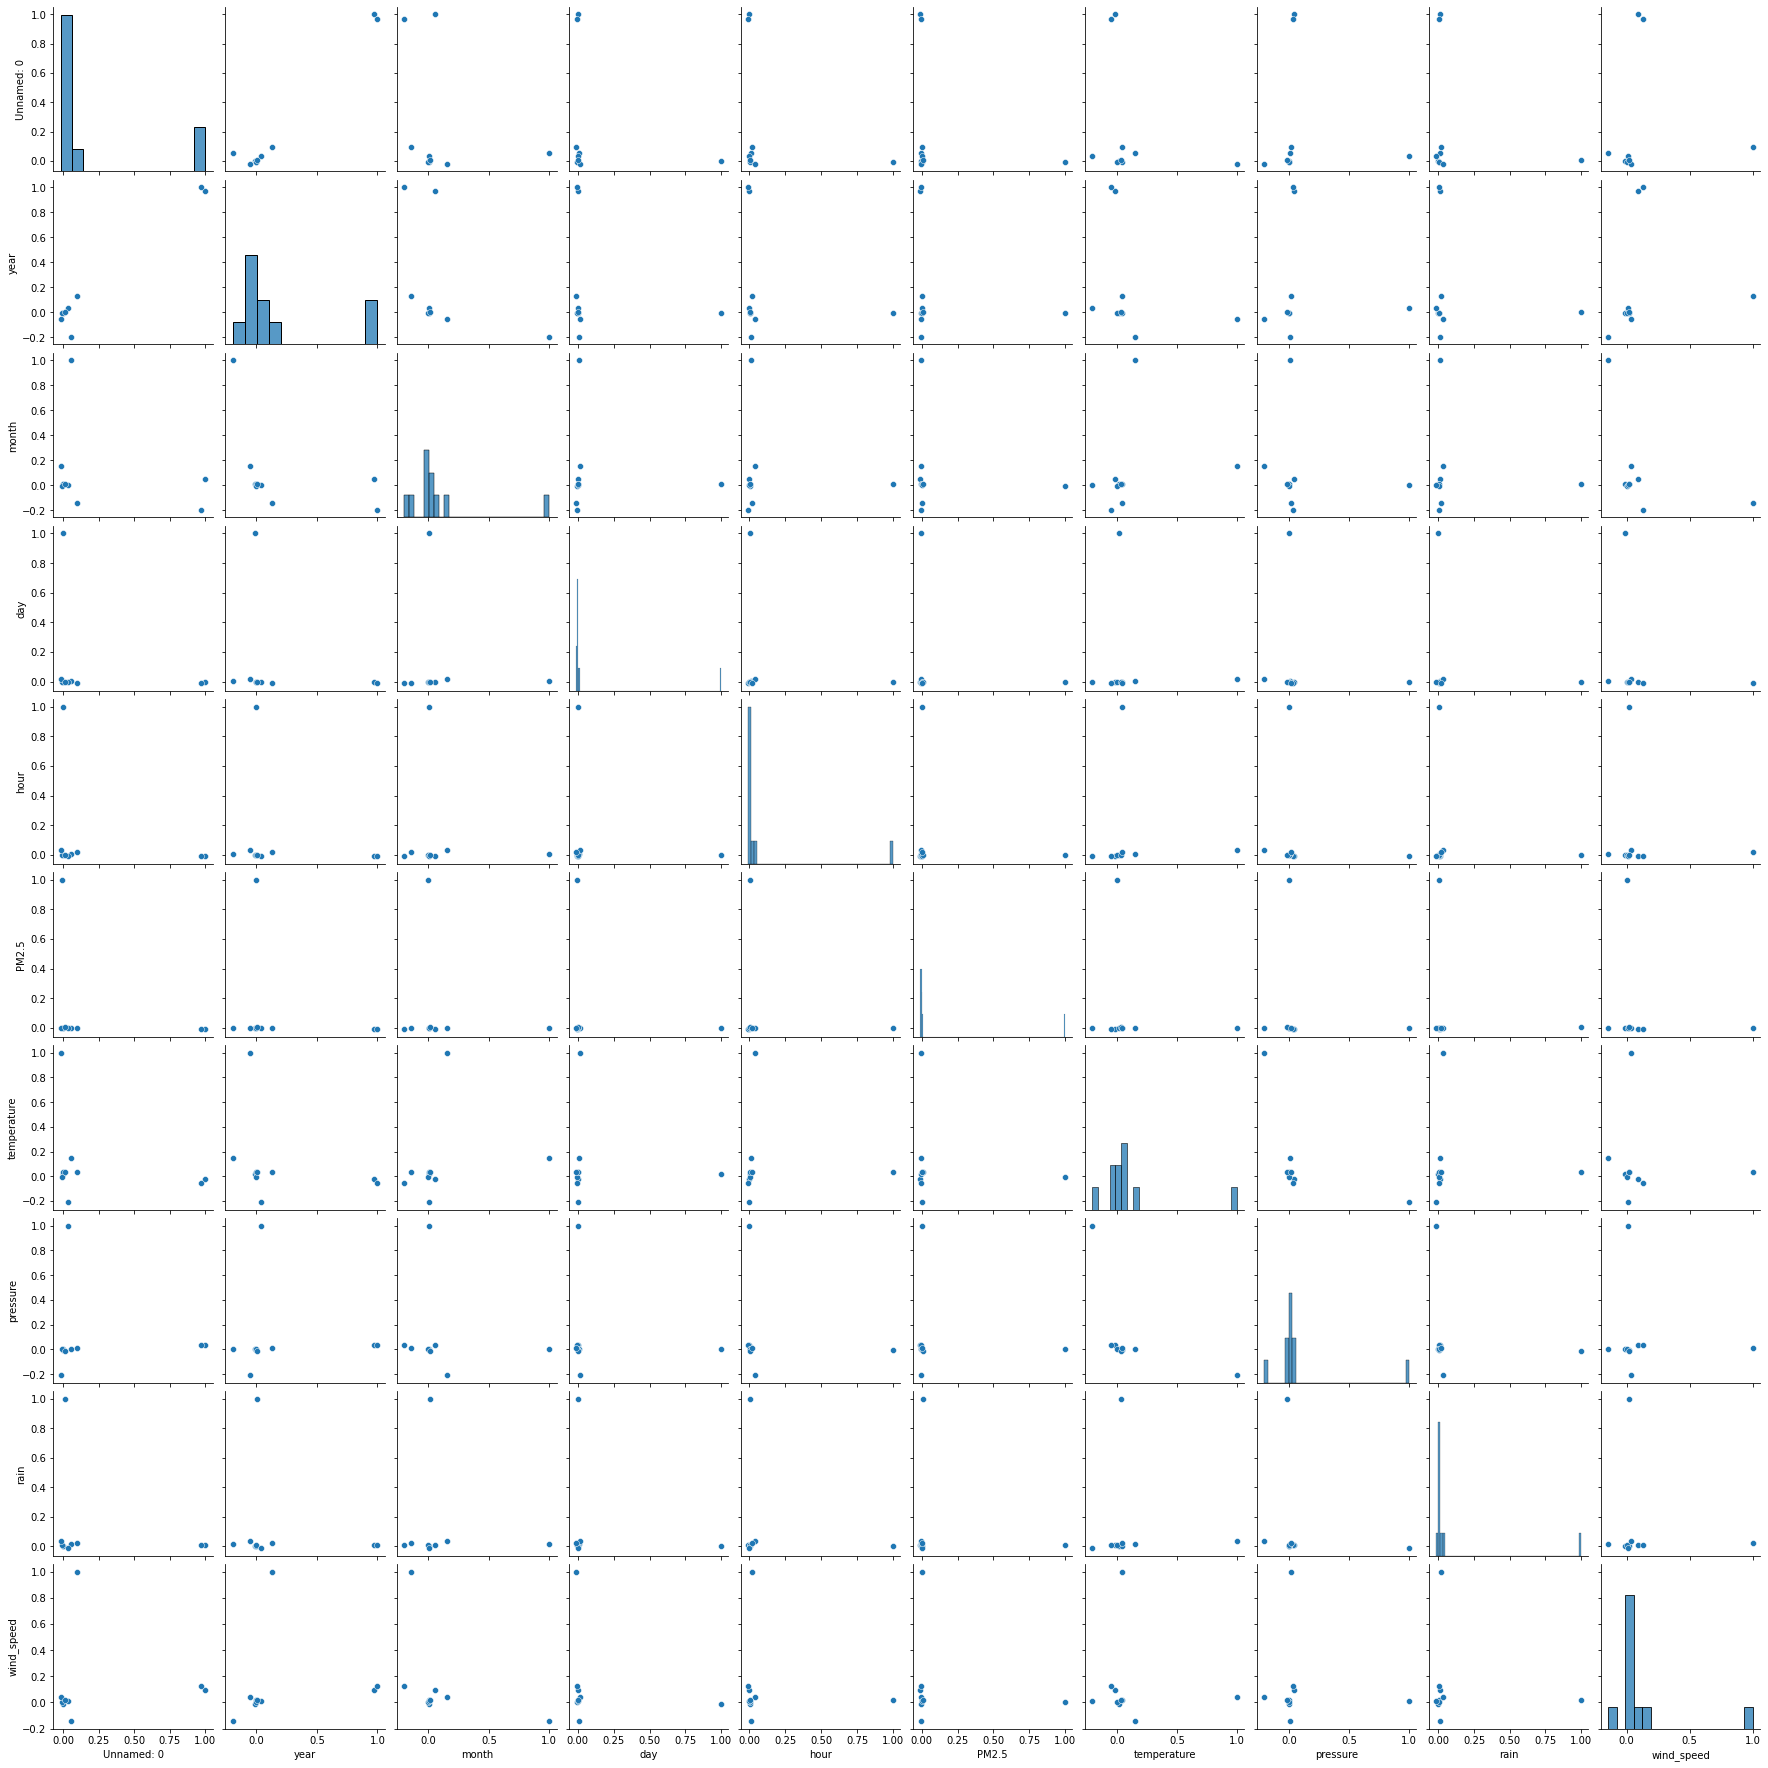

In [ ]:
#Analysing relation between each columns with every other
sns.pairplot(data=df1.corr())

##Finding correlation of **PM2.5** with rest of the columns


In [ ]:
#correlation of PM2.5 with rest of the columns
df[['year','month','day','hour','PM2.5','temperature','pressure','rain','wind_speed']].corr()['PM2.5']


year          -0.007743
month         -0.004171
day           -0.001939
hour           0.001019
PM2.5          1.000000
temperature   -0.004341
pressure      -0.000333
rain           0.027039
wind_speed     0.000988
Name: PM2.5, dtype: float64

#Heatmap Visualization
Correlation of columns is visualized though heatmap method importing from seaborn library. A good correlation is considered between -0.6 to 0.6 while 1 for the best correlation.

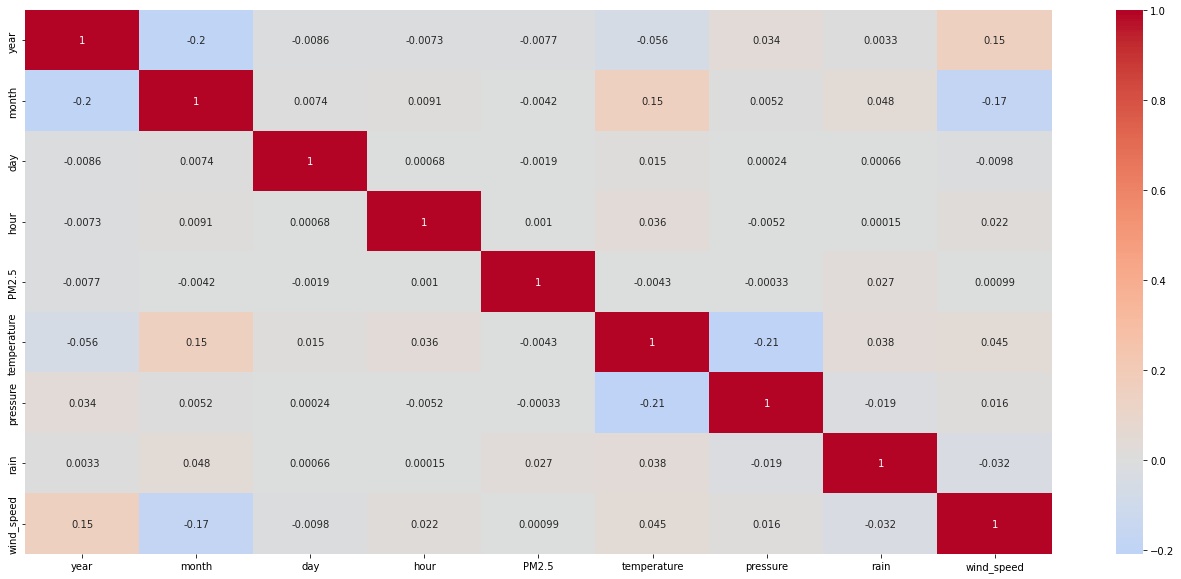

In [ ]:
#heatmap
fig, ax = plt.subplots(figsize=(23,10))
sns.heatmap(df[['year','month','day','hour','PM2.5','temperature','pressure','rain','wind_speed',]].corr(), cmap='coolwarm',center=0,  annot=True)

In [ ]:
df=df.drop(['day'],1)

In [ ]:
 #printing strong correlation pairs
cp=df1.corr().unstack()
cp.sort_values(kind="quicksort")
sp=cp[abs(cp)>0.5]
print(sp)    

Unnamed: 0   Unnamed: 0     1.000000
             year           0.968115
year         Unnamed: 0     0.968115
             year           1.000000
month        month          1.000000
day          day            1.000000
hour         hour           1.000000
PM2.5        PM2.5          1.000000
temperature  temperature    1.000000
pressure     pressure       1.000000
rain         rain           1.000000
wind_speed   wind_speed     1.000000
dtype: float64


##Plotting the dataframe
Graph plot for the dataframe using **Pandas** library.

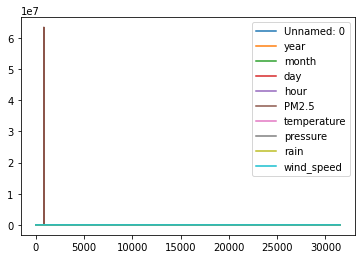

In [ ]:
#plotting the dataset using line plot
df1.plot(kind ='line')
plt.show()

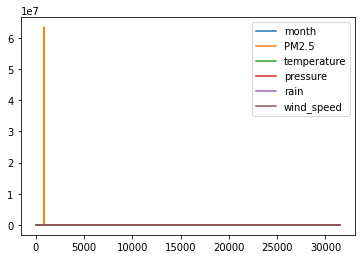

In [ ]:
df[['month','PM2.5','temperature','pressure','rain','wind_speed']].plot()
plt.show()

##Boxplot for every column after fixing outliers
The dividing green line in the box (or median) in the **'year'** column is at the top of the box, indicating that it is below skewed, which implies the median is larger than the mean, same for the **'temperature'** column, whereas the mean is more than the median in the **'month'** and **'wind speed'** columns  as they are above skewed.
Every graph that we retained has a univariate outlier (single dot) that will assist us acquire decent accuracy..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

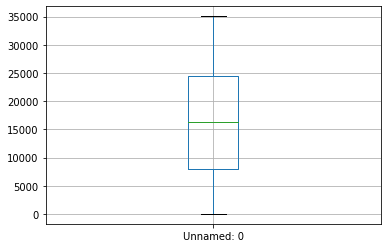

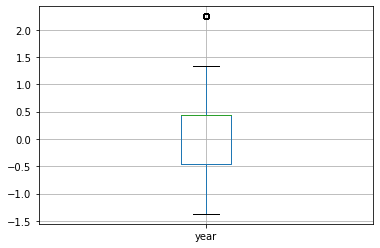

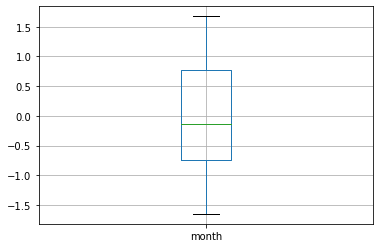

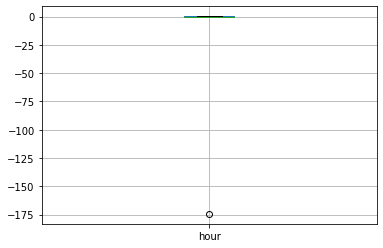

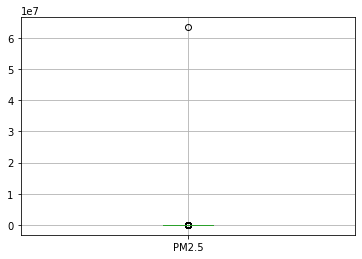

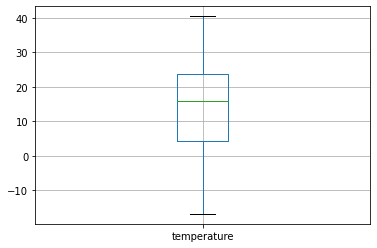

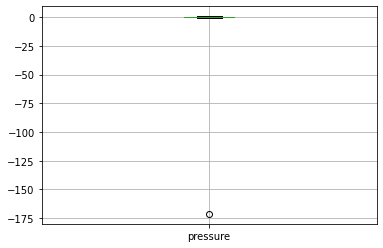

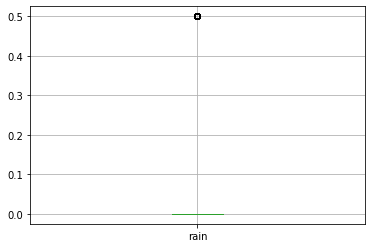

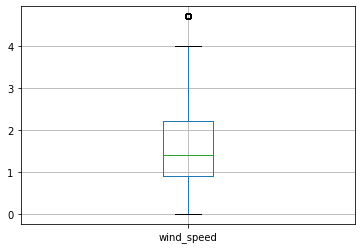

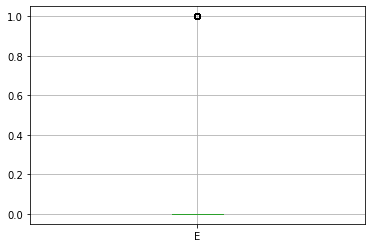

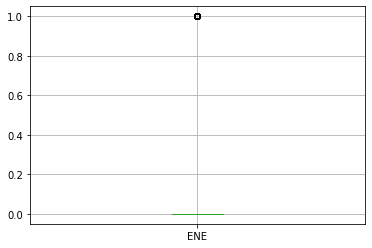

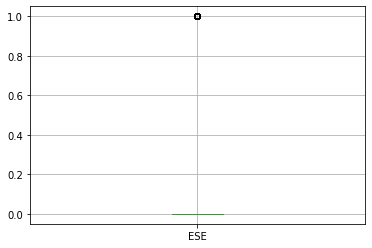

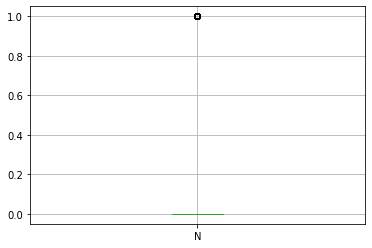

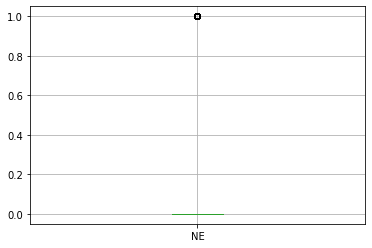

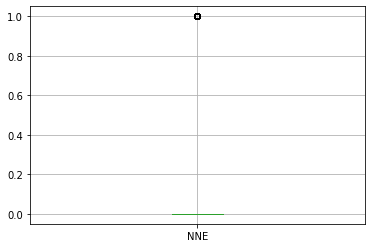

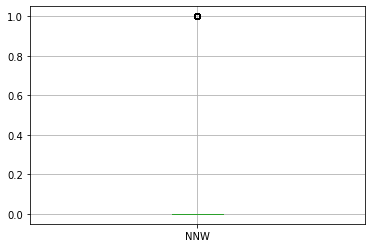

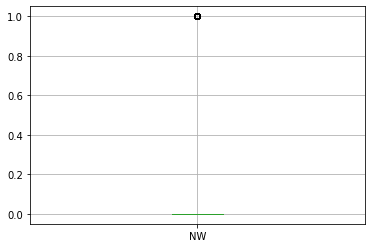

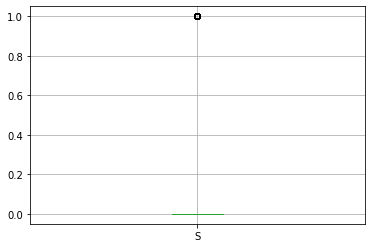

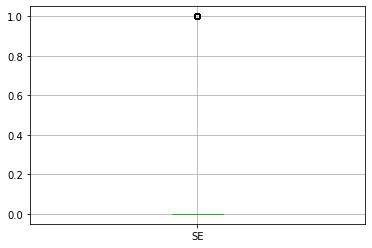

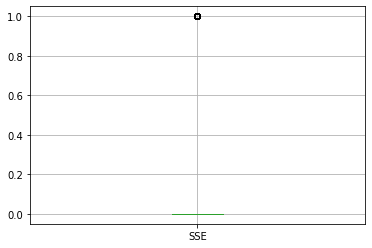

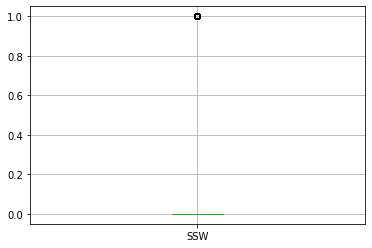

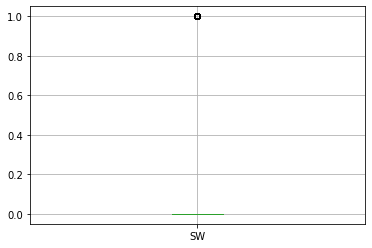

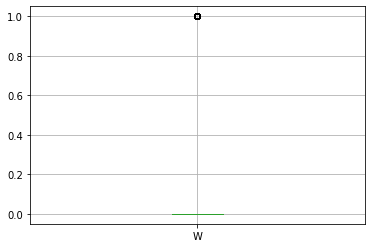

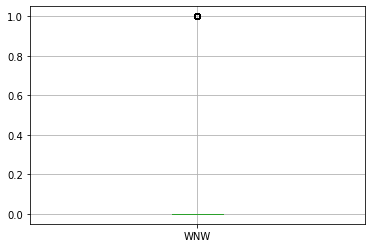

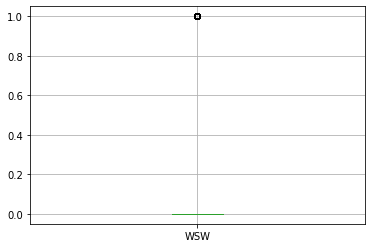

In [ ]:
#boxplot for each column
for column in df:
    plt.figure()
    df.boxplot([column])

#Graph of PM2.5 with every column
A pairplot with PM2.5 as the x-axis in each column is created to see how different columns affect PM2.5.
According to the graph, PM2.5 is **constant** across all columns.

In [ ]:
#PM2.5 getting affected by other columns
#sns.pairplot(data=df1.corr(),x_vars=['PM2.5'],y_vars=['year','month','day','hour','temperature','pressure','rain','wind_speed'])

In [ ]:
df= df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,year,month,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,-1.372595,-1.043574,-0.304069,4.0,-0.7,0.318999,0.0,4.7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.372595,-1.043574,-0.277131,8.0,-1.1,0.318999,0.0,4.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.372595,-1.043574,-0.250193,7.0,-1.1,0.326719,0.0,4.7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-1.372595,-1.043574,-0.223255,6.0,-1.4,0.352453,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-1.372595,-1.043574,-0.196316,3.0,-2.0,0.370467,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31522,2.247053,-1.345781,-0.142440,80.0,-0.3,0.221208,0.0,0.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31523,2.247053,-1.345781,0.126942,75.0,15.9,0.082242,0.0,2.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31524,2.247053,-1.345781,0.207757,51.0,11.5,0.084816,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31525,2.247053,-1.345781,-0.250193,9.0,8.6,0.133711,0.0,0.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
x = df.drop(['PM2.5'],axis=1)
y = df[['PM2.5']]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x.shape)


(22068, 23)
(22068, 1)
(9459, 23)
(9459, 1)
(31527, 23)


Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
reg = RandomForestRegressor(n_estimators=13, random_state=0)
reg.fit(x_train,y_train.values.ravel())
y_pred=reg.predict(x_test)

reg.score(x_test, y_test)


0.4635135459915851

In [ ]:
reg.score(x_train, y_train)

0.7928905220583795

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

41.012978278725186


In [ ]:
print("Predicted values of PM 2.5:", reg.predict(x_test))
y_pred = reg.predict(x_test)
y_pred.shape

Predicted values of PM 2.5: [ 36.69230769  52.23076923 195.61538462 ...  61.92307692  25.
 113.46153846]


(9459,)

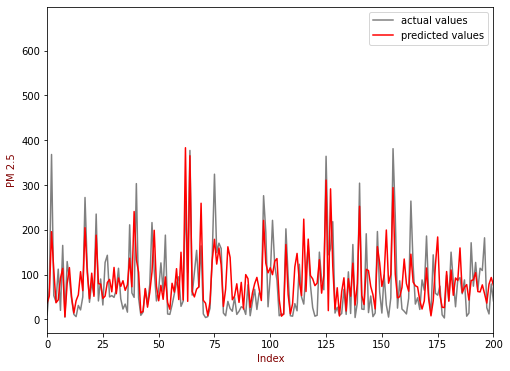

In [ ]:
x1 = np.array(y_test)
y1 = np.array(y_pred)
plt.figure(figsize=(8,6))
plt.plot(x1, color='grey')
plt.plot(y1,color='red')
plt.xlim(0,200)
plt.xlabel("Index", color='maroon')
plt.ylabel("PM 2.5", color='maroon')
plt.legend(["actual values", "predicted values"], loc ="upper right")

plt.show()

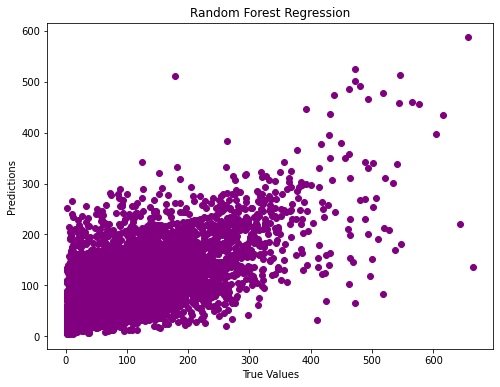

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='purple')
plt.title('Random Forest Regression')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(ccp_alpha=3.0,random_state=17)
dtr.fit(x_train, y_train)
dtr.score(x_test, y_test)

0.3010499340759732

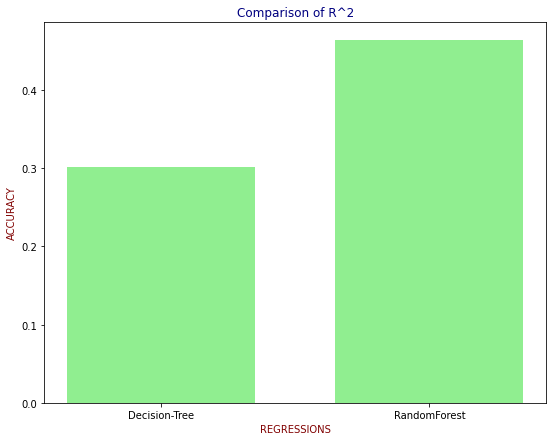

In [ ]:
x=['Decision-Tree','RandomForest']
y=[dtr.score(x_test, y_test),reg.score(x_test, y_test)]
plt.figure(figsize=(9,7))
plt.bar(x,y, width = 0.7 ,color='lightgreen')
plt.xlabel('REGRESSIONS', color='maroon')
plt.ylabel("ACCURACY", color='maroon' )
plt.title('Comparison of R^2', color='navy')
plt.show()

##INPUT FILE for prediction


In [ ]:
#importing dataset
it=pd.read_csv("/content/input - train - train (2).csv")
it

,Unnamed: 0,year,month,day,hour,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,5,1,0,-0.7,1023.7,0.0,NNW,4.4
1,1,2014,6,2,1,-1.1,1023.2,0.0,NNE,6.0
2,2,2015,7,28,2,6.0,1000.0,0.8,SSW,3.0
3,3,2016,8,5,7,2.0,1023.5,0.4,ESE,2.0
4,4,2017,11,15,11,10.0,1023.6,0.1,ENE,1.0
5,5,2018,9,6,20,7.0,1022.0,0.2,N,1.5
6,6,2019,5,7,4,4.0,1023.0,0.3,NE,2.5
7,7,2020,8,25,9,1.0,1023.9,0.5,SE,3.5
8,8,2017,2,8,10,-0.6,1023.1,0.6,W,5.5
9,9,2015,1,9,8,5.0,1023.3,0.7,E,4.8


In [ ]:
itdummies = pd.get_dummies(it['wind_direction'])
it = it.drop('wind_direction',1)
it = pd.concat([it, dummies], axis=1)


In [ ]:
it[['year','month','hour','pressure']]=scaling.fit_transform(it[['year','month','hour','pressure']])


In [ ]:
it=it.drop(['day'],1)
it= it.loc[:, ~it.columns.str.contains('^Unnamed')]
it=it.dropna()
it

,year,month,hour,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,-1.613569,-0.410152,-1.277592,-0.7,0.396037,0.0,4.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.138990,-0.068359,-1.100149,-1.1,0.324550,0.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.664411,0.273434,-0.922705,6.0,-2.992441,0.8,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-0.189832,0.615227,-0.035489,2.0,0.367443,0.4,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0.284747,1.640606,0.674285,10.0,0.381740,0.1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0.759326,0.957020,2.271275,7.0,0.152982,0.2,1.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,1.233905,-0.410152,-0.567819,4.0,0.295956,0.3,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1.708484,0.615227,0.319398,1.0,0.424632,0.5,3.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0.284747,-1.435530,0.496841,-0.6,0.310253,0.6,5.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,-0.664411,-1.777323,0.141955,5.0,0.338848,0.7,4.8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df

,year,month,hour,PM2.5,temperature,pressure,rain,wind_speed,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,-1.372595,-1.043574,-0.304069,4.0,-0.7,0.318999,0.0,4.7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,-1.372595,-1.043574,-0.277131,8.0,-1.1,0.318999,0.0,4.7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.372595,-1.043574,-0.250193,7.0,-1.1,0.326719,0.0,4.7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,-1.372595,-1.043574,-0.223255,6.0,-1.4,0.352453,0.0,3.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,-1.372595,-1.043574,-0.196316,3.0,-2.0,0.370467,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31522,2.247053,-1.345781,-0.142440,80.0,-0.3,0.221208,0.0,0.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31523,2.247053,-1.345781,0.126942,75.0,15.9,0.082242,0.0,2.9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31524,2.247053,-1.345781,0.207757,51.0,11.5,0.084816,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
31525,2.247053,-1.345781,-0.250193,9.0,8.6,0.133711,0.0,0.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
pm_ipred=reg.predict(it)


In [ ]:
print(pm_ipred)

[ 5.76923077  6.53846154 78.07692308 56.07692308 89.46153846 51.15384615
 36.30769231 26.84615385 33.46153846 55.53846154]
